In [1]:
import pandas as pd
data=pd.read_csv('test_data.csv')
data.head()

,timestamp,value,KPI ID
0,1482476580,0.043881,da10a69f-d836-3baa-ad40-3e548ecf1fbd
1,1482476640,0.041252,da10a69f-d836-3baa-ad40-3e548ecf1fbd
2,1482476700,0.043922,da10a69f-d836-3baa-ad40-3e548ecf1fbd
3,1482476760,0.129584,da10a69f-d836-3baa-ad40-3e548ecf1fbd
4,1482476820,0.111759,da10a69f-d836-3baa-ad40-3e548ecf1fbd


In [2]:
data.drop('KPI ID',axis=1,inplace=True)

In [6]:
data['timestamp'][1]

1482476640

In [5]:
pd.to_datetime(1482476640,unit='s')

Timestamp('2016-12-23 07:04:00')

In [5]:
data['timestamp']=pd.to_datetime(data['timestamp'], unit='s')

In [12]:
d=list(data['value'])
d=[round(i*100,2) for i in d]
data['value']=d

In [14]:
data.to_csv('prophet.csv')

In [15]:
import numpy as np
import fbprophet as fb
from matplotlib import pyplot as plt



In [18]:
Fb=fb.Prophet()

In [21]:
data1=data.loc[:100,:]

In [24]:
data1.columns=['ds','y']

In [25]:
Fb.fit(data1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
from sklearn.externals import joblib
joblib.dump(Fb,'model1.m')

F=joblib.load('model1.m')

Pre=F.make_future_dataframe(freq='T',periods=50,include_history=False)

forcasts=F.predict(Pre)

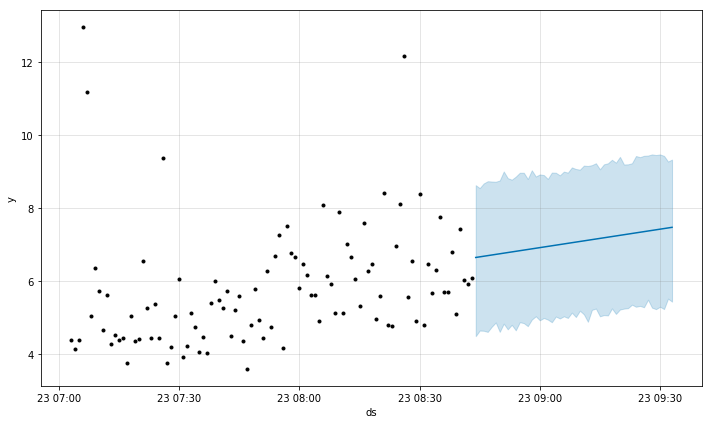

In [55]:
F.plot(forcasts).show()

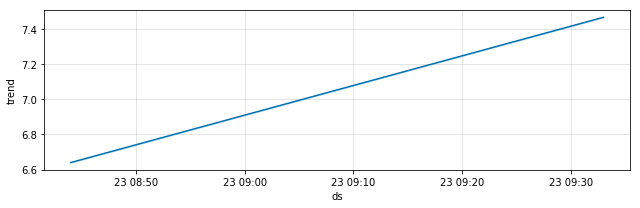

In [56]:
F.plot_components(forcasts).show()

In [1]:
import pymysql
 
# 打开数据库连接
# db = pymysql.connect("58.16.78.136:30306","root",None,"predictvalue" )
d=pymysql.connect(db='aiops_monitor', user='root', passwd='1234', host='58.16.78.136', port=23306)
# 使用 cursor() 方法创建一个游标对象 cursor
cursor = d.cursor()
 
sql = "insert into predict(predict_time,value,l_value,h_value,item_id) values('%s','%f','%f','%f','%d')" % ("2019-05-21 13:03:55",33,33,333,33)
cursor.execute(sql)
   # 提交修改
d.commit()
d.close()

In [97]:
forcast=forcasts.loc[:,['ds','trend','yhat_lower','yhat_upper']]
date=list(forcast['ds'])
trend=list(forcast['trend'])
yhat_lower=list(forcast['yhat_lower'])
yhat_upper=list(forcast['yhat_upper'])

for i in range(3,50):
    sql = "insert into predict(timestamp,id,value,l_value,h_value,item_id) values('%s','%d','%f','%f','%f','%d')" % (date[i],i,trend[i],yhat_lower[i],yhat_upper[i],i)
    cursor.execute(sql)
    d.commit()


In [ ]:
# SQL 删除语句
sql = "DELETE FROM predict WHERE id > %d" % (50)
try:
   # 执行SQL语句
   cursor.execute(sql)
   # 提交修改
   d.commit()
except:
   # 发生错误时回滚
   d.rollback()

In [12]:
#coding:UTF-8
import time

dt = "2019-05-21 03:03:55"

#转换成时间数组
timeArray = time.strptime(dt, "%Y-%m-%d %H:%M:%S")
#转换成时间戳
timestamp = time.mktime(timeArray)

print(timestamp)


1558379035.0


In [27]:
pd.to_datetime(1558379035+28800,unit='s')

Timestamp('2019-05-21 03:03:55')

In [11]:
import time

dt = "2016-05-05 20:28:54"

#转换成时间数组
timeArray = time.strptime(dt, "%Y-%m-%d %H:%M:%S")
#转换成新的时间格式(20160505-20:28:54)
dt_new = time.strftime("%Y-%m%d-%H:%M:%S",timeArray)

print(dt_new)


2016-05-05 20:28:54


In [26]:
#coding:UTF-8
import time

timestamp = 1558379035.0

#转换成localtime
time_local = time.localtime(timestamp)
#转换成新的时间格式(2016-05-05 20:28:54)
dt = time.strftime("%Y-%m-%d %H:%M:%S",time_local)

print(dt)

2019-05-21 03:03:55


In [22]:
start = pd.to_datetime('2016-05-05 12:28:54')
rng = pd.date_range(start, periods=10)

df = pd.DataFrame({'Date': rng, 'a': range(10)})  

df = df.tz_convert('Asia/Kolkata')
print (df)



TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [23]:
8*3600

28800

In [35]:
data=list(range(100))

In [36]:
data.popleft()

AttributeError: 'list' object has no attribute 'popleft'